In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/unWISE_dictonaries/')

#matplotlib.use('pdf')
font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

In [2]:
params = "mean"

In [3]:
if params == "mean":
    from green_dict_mean import *
    from red_dict_mean import *
    from blue_dict_mean import *
if params == "best-fit":
    from green_dict import *
    from red_dict import *
    from blue_dict import *

# To-do:
parameters 
flux cut 
unwise dictionaries combine

In [4]:
nu_list = 93,217,280,353
nu_list_str = '93,217,280,353'

path_save = "/Users/aleksandra/software/ILC_class-sz_curves_data/websky_"+params+"_mbb?_HOD_12-18/"
path_to_files = '/Users/aleksandra/software/class_sz/sz_auxiliary_files/'

save_to_file = "no"

In [5]:
color = "blue" ## unwise color 

In [6]:
if color=="blue":
    pdict = blue_pdict
if color=="green":
    pdict = green_pdict
if color=="red":
    pdict = red_pdict  
    
pdict['galaxy_sample_id']
#pdict

'blue'

In [7]:
TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin
T_cmb = 2.726 #Kelvin
_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

L0_websky = 4.461102571695613e-07

common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
            'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        #'dlogell':1,
        'dell':200
    
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}


# # parameters used by Fiona and Mat
# cib_params = {
#        'hm_consistency': 0,
#        'Redshift evolution of dust temperature' :  0.36,
#        'Dust temperature today in Kelvins' : 24.4,
#        'Emissivity index of sed' : 1.75,
#        'Power law index of SED at high frequency' : 1.7,
#        'Redshift evolution of L − M normalisation' : 3.6,
#        'Most efficient halo mass in Msun' : 10.**12.6,
#        'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
#        'Size of of halo masses sourcing CIB emission' : 0.5,

#         # M_min_HOD is the threshold above which nc = 1:
#         'M_min_HOD' : 10.**10,

#         'M_min' : 1e10*websky_cosmo['h'],
#         'M_max' : 1e16*websky_cosmo['h'],
#         'z_min' : 0.07,
#         'z_max' : 6,
    
    
# }


tsz_params ={
       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'units for tSZ spectrum': 'dimensionless',
       'n_ell_pressure_profile' : 100,
       'n_m_pressure_profile' : 100,
       'n_z_pressure_profile' : 100,
       'x_outSZ': 4.,
       'truncate_wrt_rvir':0,
       'pressure_profile_epsrel':1e-3,
       'pressure_profile_epsabs':1e-40,

}

websky_cib_params = {
       
       'Redshift evolution of dust temperature' :  0.2,
       'Dust temperature today in Kelvins' : 20.7,
       'Emissivity index of sed' : 1.6,
       'Power law index of SED at high frequency' : 0, # not given in WebSky paper, actually not relevant since we dont use high freqs in websky.
       'Redshift evolution of L − M normalisation' : 1.28,
       'Most efficient halo mass in Msun' : 10.**12.3,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 1e-7,  # not given in WebSky paper
       'Size of of halo masses sourcing CIB emission' : 0.3,
       'z_plateau_cib' : 2.,

        # M_min_HOD is the threshold above which nc = 1:
        # 'M_min_HOD' : 10.**10.1, # not used here
        'use_nc_1_for_all_halos_cib_HOD': 1,
    
        'sub_halo_mass_function' : 'JvdB14',
        'M_min_subhalo_in_Msun' : 1e11,
        'use_redshift_dependent_M_min': 1,
        #'full_path_to_redshift_dependent_M_min':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
        #'M_min' : 1e10*websky_cosmo['h'], # not used
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 5e-3,
        'z_max' : 4.6,

        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str, 
    
        #for the monopole computation:
        'freq_min': 2e1,
        'freq_max': 4e3,
        'dlogfreq' : 0.05,

# table 1 of https://arxiv.org/pdf/1309.0382.pdf
#1: freq GHz 2: Flux cut mJy
# 100 - 400
# 143 - 350
# 217 - 225
# 353 - 315
# 545 - 350
# 857 - 710
# 3000  - 1000
#cib_Snu_1 = 315.
#cib_Snu_2 = 315.
        #'cib_Snu_cutoff_list [mJy]':'315',
        'has_cib_flux_cut': 0
}



# Frequency-independent

## CMB

In [8]:
common_settings_cmb = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':10000, 

}

In [9]:
M = Class()
M.set(common_settings_cmb)
M.compute()
cl_tot = M.raw_cl(10000)
cl_lensed = M.lensed_cl(10000)
ell = cl_tot['ell']
M.struct_cleanup()  # clean output
M.empty()           # clean input


factor = TCMB**2 * ell*(ell+1.)/2./np.pi

In [10]:
# noise 
ell_noise, cl_noise = np.loadtxt("/Users/aleksandra/Desktop/noise_curves_from_kSZ2X/nl_advact_20uK_1p5arcmin_uK2_170422.txt").T

## kSZ

In [11]:
# battaglia 12 kSZ theory computation. Patchy is before reionization, the other after reionization; should add these two
CellkSZhomog = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS.d.txt')
CellkSZpatchy = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS_patchy.d.txt')

# get rid of ell*(ell+1)/2pi factors  
ell_theory_battaglia = CellkSZhomog[:,0]
dl_kSZ_theory_battaglia = CellkSZhomog[:,1] + CellkSZpatchy[:,1]
cl_kSZ_theory_battaglia = (CellkSZhomog[:,1] + CellkSZpatchy[:,1]) * 2.0*np.pi/(ell_theory_battaglia)/(ell_theory_battaglia+1.0)


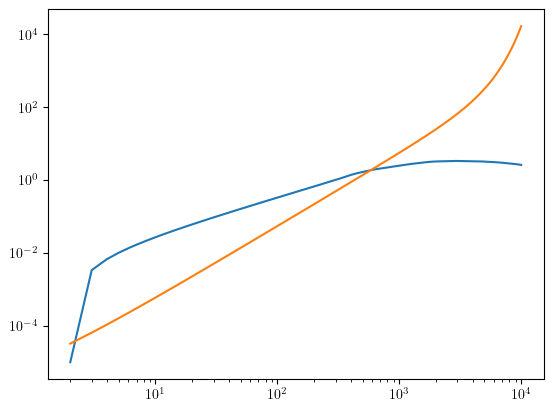

In [12]:
plt.plot(ell_theory_battaglia , dl_kSZ_theory_battaglia)
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi)
plt.yscale("log")
plt.xscale("log")

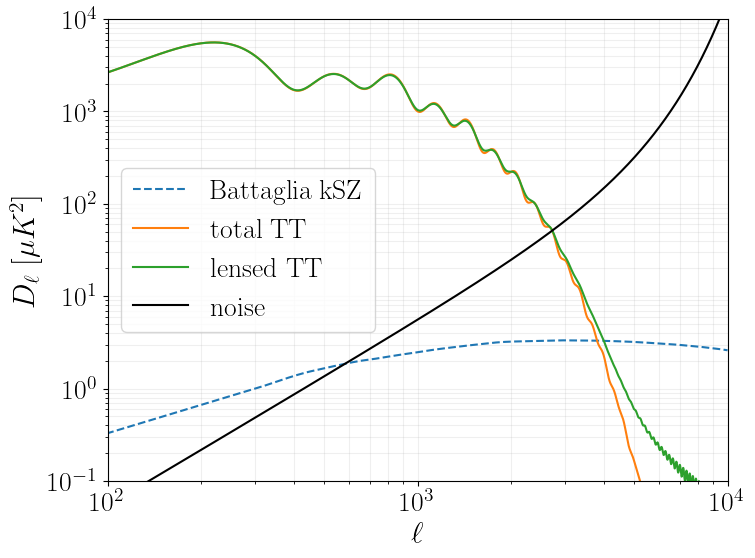

In [13]:
plt.figure(figsize=(8,6))

plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia,"--", label = "Battaglia kSZ")
plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
plt.plot(ell, 1.e12*factor*cl_lensed['tt'],label='lensed TT')
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi, color= "black", label="noise")

plt.yscale("log")
plt.xscale("log")
plt.xlim(100,1e4)
plt.ylim(1e-1,1e4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$\ell$',fontsize=22)
plt.ylabel(r'$D_\ell$  [$\mu K^2$]',fontsize=22)
plt.grid(which='both',alpha=0.2)
plt.legend(fontsize=20)


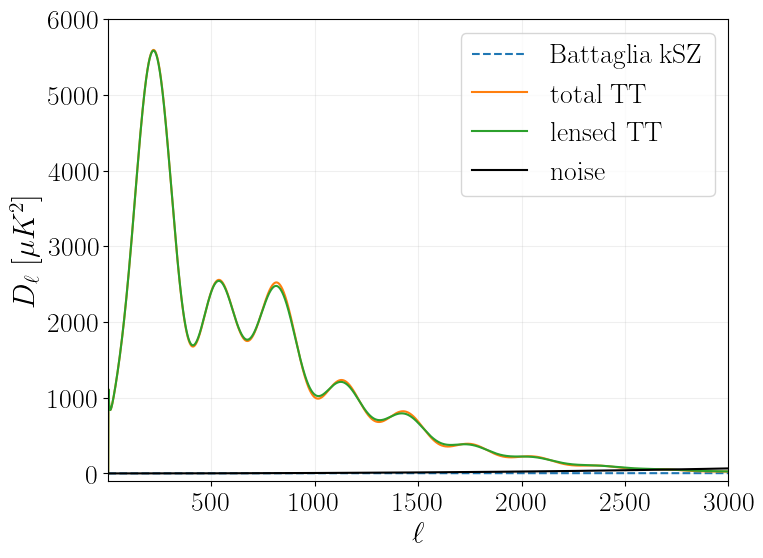

In [14]:
plt.figure(figsize=(8,6))

plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia,"--", label = "Battaglia kSZ")
plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
plt.plot(ell, 1.e12*factor*cl_lensed['tt'],label='lensed TT')
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi, color= "black", label="noise")

# plt.yscale("log")
# plt.xscale("log")
plt.xlim(2,3e3)
plt.ylim(-101,6e3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$\ell$',fontsize=22)
plt.ylabel(r'$D_\ell$  [$\mu K^2$]',fontsize=22)
plt.grid(which='both',alpha=0.2)
plt.legend(fontsize=20)


# Frequency-dependent

In [15]:
def convert_Jysr_to_uK(nu_in_GHz):
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_MJy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_MJy


def tSZ_spectral_funct_at_nu_in_GHz(nu_in_GHz):
        T_cmb = 2.726
        frequency_in_Hz = nu_in_GHz*1e9
        Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
#         print("Tcmb_gNU=", Tcmb_gNU)
#         print("for", nu_in_GHz, "GHz")
        return Tcmb_gNU


## tSZ

In [16]:
ti = time.perf_counter()
M = Class()
M.set(pdict) 
M.set(common_settings)
M.set(websky_cosmo)
M.set(websky_cib_params)
M.set(tsz_params)

M.set({'output':'cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h,tSZ_1h,tSZ_2h,gal_cib_1h,gal_cib_2h,tSZ_gal_1h, tSZ_gal_2h,tSZ_lensmag_1h,tSZ_lensmag_2h,lensmag_lensmag_1h,lensmag_lensmag_2h,lensmag_cib_1h,lensmag_cib_2h'})
#M.set({'output':'tsz_1h,gal_1h'})

M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,  
      })
M.compute()


tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

KeyboardInterrupt: 

In [ ]:
cl_cib_cib = M.cl_cib_cib()
cl_tsz_cib = M.cl_tSZ_cib()
cl_sz = M.cl_sz()
cl_cib_g = M.cl_gal_cib()
cl_tszg = M.cl_yg()
# lensmag terms
cl_mumu = M.cl_mm()
cl_mu_tSZ = M.cl_ym()

In [ ]:

cl_mu_tSZ 

with flux cut:

In [ ]:
# M = Class()
# M.set({'output':'cib_monopole,cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h'})
# M.set(common_settings)
# M.set(websky_cosmo)
# M.set(websky_cib_params)
# M.set(tsz_params)

# M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
#        'cib_frequency_list_num' : 3,
#        'cib_frequency_list_in_GHz' : nu_list_str,  
# # table 1 of https://arxiv.org/pdf/1309.0382.pdf
# #1: freq GHz 2: Flux cut mJy
# # 100 - 400
# # 143 - 350
# # 217 - 225
# # 353 - 315
# # 545 - 350
# # 857 - 710
# # 3000  - 1000
#         'cib_Snu_cutoff_list [mJy]':'315,350,225',
#         'has_cib_flux_cut': 1
#       })
# M.compute()
# cl_cib_cib_flux_cut = M.cl_cib_cib()
# cib_monopole_flux_cut = M.cib_monopole()
# cl_tsz_cib_flux_cut = M.cl_tSZ_cib()

In [ ]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{tSZ \times tSZ} / 2 \pi \,\,\, [\mu K^2]$", size=30)

plt.grid(which='both',alpha=0.2)

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy,":", label=r'yy')

for (i,nu) in enumerate(nu_list):
    plt.loglog(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2),label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB 

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h + dls_cib_2h, label=r' %.1i'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h,"--",  label=r' %.1i, 1h'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_2h, ":", label=r' %.1i, 2h'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")

plt.xlim(100, 10000)

ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h + dls_cib_2h, label=r'%.1f GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [\mu K^2]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(100, 10000)

ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])/cls_to_dls
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], cls_to_dls*(dls_cib_1h + dls_cib_2h)/ convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu), label=r'%.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

not reproducing Fig 3 in Fiona/Mat but params different ?


## tSZ x CIB

In [ ]:
ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(8,4))
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
    plt.title(r'y $\times$ CIB %.1i GHz (assume CIB comes in Jy/sr)'%(nu), fontsize=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    spec = abs(tSZ_spectral_funct_at_nu_in_GHz(nu))
    
    #cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h']))/cls_to_dls,'--',color ="blue")#, label=r'1h,  %.1i'%(nu))
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'--',color="green")#, label=r'2h,  %.1i'%(nu))
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-', color="red")#,label=r'$\nu$ = %.1i'%(nu))

    plt.legend(loc='right',  fontsize=12)    
  

In [ ]:
# ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
# cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

# for (i,nu) in enumerate(nu_list):
#     plt.figure(figsize=(6,3))
#     plt.xlabel(r"$\ell$", size=30)
#     plt.ylabel(r"$ C_l^{\rm{tsz \times \nu}} \,\,\, [Jy/sr]$", size=30)
#     plt.yticks(fontsize=30)
#     plt.xticks(fontsize=30)
#     plt.title(r'tSZ $\times$ CIB %.1i GHz'%(nu), fontsize=30)
#     plt.grid(which='both',alpha=0.2)
#     plt.yscale("log")
#     plt.xscale("log")
#     cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
#     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h']))/cls_to_dls,'--',color ="blue")#, label=r'1h,  %.1i'%(nu))
#     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'--',color="green")#, label=r'2h,  %.1i'%(nu))
#     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-', color="red")#,label=r'$\nu$ = %.1i'%(nu))

#     plt.legend(loc='right',  fontsize=12)    
  

In [ ]:
# ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
# cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

# for (i,nu) in enumerate(nu_list):
#     plt.figure(figsize=(6,3))
#     plt.xlabel(r"$\ell$", size=30)
#     plt.ylabel(r"$ C_l^{\rm{tsz \times \nu}} \,\,\, [Jy/sr]$", size=30)
#     plt.yticks(fontsize=30)
#     plt.xticks(fontsize=30)
#     plt.title(r'tSZ $\times$ CIB %.1i GHz'%(nu), fontsize=30)
#     plt.grid(which='both',alpha=0.2)
#     plt.yscale("log")
#     plt.xscale("log")
#     #cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
# #     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h']))/cls_to_dls,'--',color ="blue")#, label=r'1h,  %.1i'%(nu))
# #     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'--',color="green")#, label=r'2h,  %.1i'%(nu))
# #     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-', color="red")#,label=r'$\nu$ = %.1i'%(nu))
#     plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['1h'])+np.asarray(cl_yCIB['2h']))/cls_to_dls,'-',color="red",label=r'$\nu$ = %.1i GHz'%(nu))
#     plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['1h']))/cls_to_dls,'-',color="blue",label=r'1h, $\nu$ = %.1i GHz'%(nu))
#     plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['2h']))/cls_to_dls,'-',color="green",label=r'2h, $\nu$ = %.1i GHz'%(nu))

#     plt.legend(loc='right',  fontsize=12)    
  

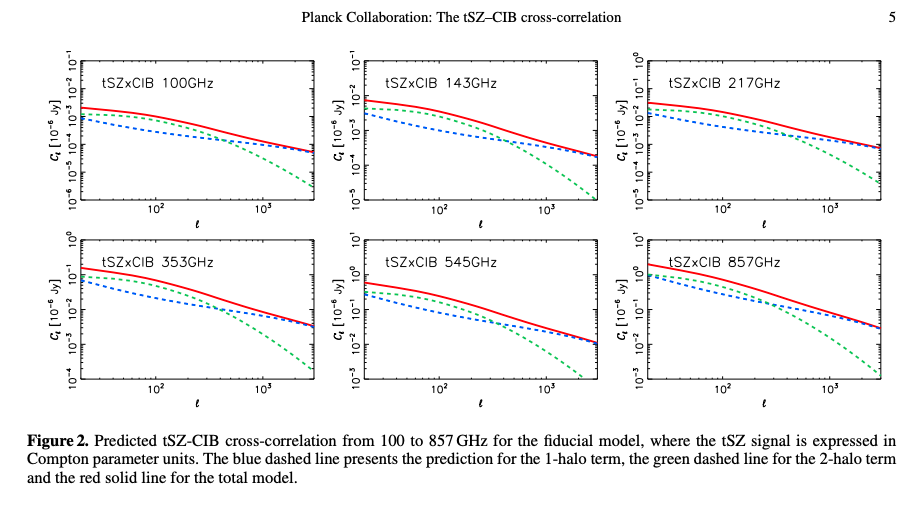

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [Jy/sr]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h'])),'-',label=r'$\nu$ = %.1i'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


## tSZ x g 

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$",  fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{tSZ \times g}} / 2 \pi \,\,\, [\mu K]$", fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title(r'tSZ $\times$ g', fontsize=30)
plt.grid(which='both',alpha=0.2)

for (i,nu) in enumerate(nu_list):
    yg = np.asarray(cl_tszg['1h'])+np.asarray(cl_tszg['2h'])
    plt.plot(cl_tszg['ell'],yg*tSZ_spectral_funct_at_nu_in_GHz(nu),'-',label=r' %.1i GHz'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

In [ ]:
# M = Class()
# M.set({'output':'gal_cib_1h,gal_cib_2h,lensmag_cib_1h,lensmag_cib_2h'})
# M.set(pdict)
# M.set(common_settings)
# M.set(cib_params)


# M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
#         'Redshift evolution of dust temperature' :  0.36,
#        'Dust temperature today in Kelvins' : 24.4,
#        'Emissivity index of sed' : 1.75,
#        'Power law index of SED at high frequency' : 1.7,
#        'Redshift evolution of L − M normalisation' : 3.6,
#        'Most efficient halo mass in Msun' : 10.**12.6,
#      #  'Normalisation of L − M relation in [Jy MPc2/Msun/Hz]' : 6.4e-8,
#        'Size of of halo masses sourcing CIB emission' : 0.5,

       
#        'cib_frequency_list_num' : len(nu_list),
#        'cib_frequency_list_in_GHz' : nu_list_str,   
#       })
# M.compute()

# cl_cib_g = M.cl_gal_cib()

In [ ]:
str(nu_list[1])

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xg} / 2 \pi \ \ [Jy/sr]$", fontsize=30)
plt.title(r'CIB $\times$ g [Jy/sr]', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

for (i,nu) in enumerate(nu_list):
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], cl_cib_g_1h , label=r'%.1i GHz, 1h'%(nu))
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], cl_cib_g_2h , "--", label=r'%.1i GHz, 2h'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

In [ ]:
ell_cib_gal = np.asarray(cl_cib_g[str(nu_list[1])]['ell'])
cls_to_dls = ell_cib_gal*(ell_cib_gal+1.)/2./np.pi 

plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$ C_l^{\rm{CIB}xg} $  \ [Jy/sr]", fontsize=30)
plt.title(r'CIB $\times$ g', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale("log")
plt.xscale("log")
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], cl_cib_g_1h/cls_to_dls, label=r'%.1i GHz, 1h'%(nu))
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], cl_cib_g_2h /cls_to_dls, "--", label=r'%.1i GHz, 2h'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xg} / 2 \pi \ [\mu K] $", fontsize=30)
plt.title(r'CIB $\times$ g', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)  
    plt.loglog(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK , label=r'%.1i GHz'%(nu))

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  gg

In [ ]:
M = Class()
M.set(pdict)
M.set(common_settings)

M.set({
        'output':'gal_gal_1h, gal_gal_2h, gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h',
        })        
M.compute()
    
    
cl_gg = M.cl_gg()
cl_gg_ell = np.asarray(cl_gg['ell'])
cl_gg_1h = np.asarray(cl_gg['1h'])
cl_gg_2h = np.asarray(cl_gg['2h'])

cl_to_dl_gg = cl_gg_ell*(cl_gg_ell+1)/2/np.pi

In [ ]:
cl_gg_1h+cl_gg_2h

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{gg} / 2 \pi $", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")

for (i,nu) in enumerate(nu_list): 
    plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h) , label=r'%.1i GHz'%(nu))
    

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

### Alex data

In [ ]:
path_data = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/"
path_cov = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

if color == 'blue':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
    cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
    A_shot_noise  = A_shot_noise_blue
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')
if color == 'green':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
    cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
    A_shot_noise  = A_shot_noise_green
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')
if color == 'red':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample7.dat')
    cov = np.loadtxt(path_cov + "Covariance_7777_red.txt")
    #s = s_red
    A_shot_noise  = A_shot_noise_red
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_red_16.2_transfer_namaster.txt')

ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov
print(color)
print(pdict['galaxy_sample_id'])
#print(cl_alex[:10])
print(A_shot_noise)

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$C_l^{gg}$", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")
plt.errorbar(ell_alex[1:10], (cl_alex)[1:10], yerr= sigma_alex[1:10], fmt = ".", color = color, capsize=4, label="Alex data")

shot_noise_gg = 1.81*1e-7*np.ones(10000)

plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h)/cl_to_dl_gg + 1.81*1e-7 , label=r'gg + shot noise')
plt.plot(shot_noise_gg, "--", label = "shot noise Alex")

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

In [ ]:
(cl_gg_1h+cl_gg_2h)/cl_to_dl_gg

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$C_l^{gg}$", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")
plt.xlim(10, 1.e3)

plt.errorbar(ell_alex[1:10], (cl_alex)[1:10], yerr= sigma_alex[1:10], fmt = ".", color = color, capsize=4, label="Alex data")

shot_noise_gg = 1.81*1e-7*np.ones(10000)

plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h)/cl_to_dl_gg + 0.92*1e-7 , label=r'gg + shot noise')
plt.plot(shot_noise_gg, "--", label = "shot noise Alex")

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

missing the magnification terms 

# Plot everything 

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    ## CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
    plt.plot(ell, 1.e12*factor*cl_lensed['tt'],".",label='lensed TT')    
    ## kSZ
    #plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia, color = "red", label = "kSZ (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZhomog[:,1], color = "red", label = "kSZ late (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZpatchy[:,1],"--",  color = "red", label = "kSZ patchy (Battaglia) ")

    ## tSZ
    #plt.plot(cls_tSZ[i]['ell'],cls_tSZ[i]['1h']+cls_tSZ[i]['2h'], color="blue", label=r'tSZ')
    tsz_tsz = yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2)
    plt.plot(cl_sz['ell'],tsz_tsz, color="blue", label=r'tSZ')
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB_uK = (cls_cib_1h+cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK, label=r'CIB')
    
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg (unitless)')
    
   ## noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    if save_to_file == "yes":
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxCIB.txt", (cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxtSZ.txt", (cl_sz['ell'],tsz_tsz))
if save_to_file == "yes":
    np.savetxt(path_save+"ell_dl_CMB_lensed.txt", (ell, 1.e12*factor*cl_lensed['tt']))
    np.savetxt(path_save+"ell_dl_CMB.txt", (ell, 1.e12*factor*cl_tot['tt']))
    np.savetxt(path_save+"ell_dl_gg_"+color+".txt", (cl_gg_ell, cl_gg_1h+cl_gg_2h))


In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    # CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')  
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    # tSZ x g
    yg = np.asarray(cl_tszg['1h'])+np.asarray(cl_tszg['2h'])
    tSZg_uK = yg*tSZ_spectral_funct_at_nu_in_GHz(nu)
    plt.plot(cl_tszg['ell'],abs(tSZg_uK), "--",color="lightblue", label=r'$|$tSZ x g$|$')
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK , color="lightgreen", label=r'CIB $\times$ g')

    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBtSZ_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)*tSZ_spectral_funct_at_nu_in_GHz(nu)/ convert_Jysr_to_uK(nu)
    plt.plot(ell_tsz_cib, abs(CIBtSZ_uK), label=r'$|$ tSZ $\times$ CIB $|$')
    
    #noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    #plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    if save_to_file == "yes":
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxCIB.txt", (ell_tsz_cib, CIBtSZ_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxg_"+color+".txt", (cl_tszg['ell'], tSZg_uK))
        np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxg_"+color+".txt", (cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK))


# Plot cross frequencies 

## CIB x CIB

In [ ]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"CIB \ $\times$ \ CIB", fontsize =30)
  
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            nu1_nu2 = str(nu1)+"x"+str(nu2)
            nu2_nu1 = str(nu2)+"x"+str(nu1)
            if nu1_nu2 in cl_cib_cib:
                print(nu1_nu2)
                cl_cib_1h = np.asarray(cl_cib_cib[nu1_nu2]['1h'])
                cl_cib_2h = np.asarray(cl_cib_cib[nu1_nu2]['2h'])
                cl_cib_uK = (cl_cib_1h+cl_cib_2h) / convert_Jysr_to_uK(nu1) /convert_Jysr_to_uK(nu2)
                plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], cl_cib_uK, label=r"%.1i  $\times$ %.1i "%(nu1,nu2))#str(mu)+"x"+str(niu))
                if save_to_file == "yes":
                    np.savetxt(path_save+'ell_dl_'+str(nu1)+"x"+str(nu2)+"_GHz_CIBxCIB.txt", ( cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], cl_cib_uK ) )
                    np.savetxt(path_save+'ell_dl_'+str(nu2)+"x"+str(nu1)+"_GHz_CIBxCIB.txt", ( cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], cl_cib_uK ) )

        
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x tSZ 

In [ ]:
# function used to compute tsz at nu (inside class-sz)
def cl_sz_at_nu1_nu2_in_GHz_in_microK2(cl_sz, nu1_in_GHz, nu2_in_GHz):
    print(nu1_in_GHz, nu2_in_GHz)
    frequency1_in_Hz, frequency2_in_Hz = nu1_in_GHz*1e9, nu2_in_GHz*1e9
    Tcmb_gNU1 = TCMB*((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))/2.))-4.)
    Tcmb_gNU2 = TCMB*((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    r = {}
    r['ell'] = np.asarray(cl_sz['ell'])
    r['1h'] = np.asarray(cl_sz['1h'])*Tcmb_gNU1*Tcmb_gNU2
    r['2h'] = np.asarray(cl_sz['2h'])*Tcmb_gNU1*Tcmb_gNU2
    return r

In [ ]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"$|$ tSZ \ $\times$ \ tSZ $|$", fontsize =30)
  
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            cl_tsz_cross = ( np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']) )*tSZ_spectral_funct_at_nu_in_GHz(nu1)*tSZ_spectral_funct_at_nu_in_GHz(nu2)
            plt.plot(cl_sz['ell'], abs(cl_tsz_cross), label=r"%.1i $\times$ %.1i"%(nu1, nu2))
            if save_to_file == "yes":
                np.savetxt(path_save+'ell_dl_'+str(nu1)+"x"+str(nu2)+"_GHz_tSZxtSZ.txt", ( cl_sz['ell'], cl_tsz_cross ) )
                np.savetxt(path_save+'ell_dl_'+str(nu2)+"x"+str(nu1)+"_GHz_tSZxtSZ.txt", ( cl_sz['ell'], cl_tsz_cross ) )

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## tSZ x CIB

In [ ]:
# assuming cl_tSZ_CIB is already multiplied by the spectral response function 

def cl_yCIB_at_nu_in_GHz(cl_sz_cib, nu_in_GHz):
    print(nu_in_GHz)
    frequency_in_Hz= nu_in_GHz*1e9
    Tcmb_gNU1 = TCMB*((_h_P_*frequency_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    yCIB = {}
    yCIB['ell'] = np.asarray(cl_sz_cib['ell'])
    yCIB['1h'] = np.asarray(cl_sz_cib['1h'])/Tcmb_gNU1
    yCIB['2h'] = np.asarray(cl_sz_cib['2h'])/Tcmb_gNU1
    return yCIB

In [ ]:
for (i,nu_cib) in enumerate(nu_list):
    plt.figure(figsize=(12,8))
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{ tSZ \times \nu}} \,\,\, [\mu K^2]$", size=30)
    plt.title(r' $|$ tSZ $\times$ CIB  $|$', fontsize=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_cib)]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu_cib)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu_cib)]['2h'])  
    CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)/ convert_Jysr_to_uK(nu_cib)
    

    for (j,nu_sz) in enumerate(nu_list):
        if nu_sz!=nu_cib:
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu_sz)
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK),'-',label=r'%.1i $\times$ %.1i '%(nu_sz, nu_cib))
            if save_to_file == "yes":
                np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )
                np.savetxt(path_save+"ell_dl_"+str(nu_cib)+"x"+str(nu_sz)+"_GHz_CIBxtSZ.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

    plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
for (i,nu_cib) in enumerate(nu_list):
    plt.figure(figsize=(12,8))
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{ tSZ \times \nu}} \,\,\, [\mu K^2]$", size=30)
    plt.title(r' $|$ tSZ $\times$ CIB  $|$', fontsize=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_cib)]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu_cib)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu_cib)]['2h'])  
    CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)/ convert_Jysr_to_uK(nu_cib)
    

    for (j,nu_sz) in enumerate(nu_list):
        if nu_sz!=nu_cib:
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu_sz)
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK),'-',label=r'%.1i $\times$ %.1i '%(nu_sz, nu_cib))
            if save_to_file == "yes":
                np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

    plt.legend(loc='right',  fontsize=20)    
  

# CIB x tSZ all plot

In [ ]:
for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1>=nu2:
            plt.figure(figsize=(5,4))
            plt.xlabel(r"$\ell$", size=30)
            plt.title(r'%.1i $\times$ %.1i'%(nu1, nu2), fontsize=30)
            plt.ylabel(r"$ C_l \,\,\, [Jy^2/sr]$", size=30)
            plt.yticks(fontsize=30)
            plt.xticks(fontsize=30)
            plt.grid(which='both',alpha=0.2)
            plt.yscale("log")
            plt.xscale("log")

            #CIB
            nu1_nu2 = str(nu1)+"x"+str(nu2)
            cl_cib_1h = np.asarray(cl_cib_cib[nu1_nu2]['1h'])
            cl_cib_2h = np.asarray(cl_cib_cib[nu1_nu2]['2h'])
            cl_cib_Jy2sr = (cl_cib_1h+cl_cib_2h)

            #tSZ
            cl_tsz = yy*tSZ_spectral_funct_at_nu_in_GHz(nu1)*tSZ_spectral_funct_at_nu_in_GHz(nu2)
            cl_tsz_Jy2sr= cl_tsz * convert_Jysr_to_uK(nu1) * convert_Jysr_to_uK(nu2)

            #tSZ x CIB (assume in uK)
            cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu1)]['1h'])
            cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu1)]['2h'])  
            CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h) * convert_Jysr_to_uK(nu1)
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu2) * convert_Jysr_to_uK(nu2)

            cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK/cls_to_dls), color="red", label="tSZ x CIB")
            plt.plot(ell_tsz_cib, abs(cl_tsz_Jy2sr/cls_to_dls), color="blue", label="tSZ")
            plt.plot(ell_tsz_cib, abs(cl_cib_Jy2sr/cls_to_dls), color="black", label="CIB")
            #np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

            plt.legend(loc='right',  fontsize=20)    
  

# CIB - g 

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=150)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    #plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    
    
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown",linewidth=2, label=r'gg')
    plt.plot(cl_gg_ell, cl_gg_1h , "--", color="brown", label=r'gg 1h ')
    plt.plot(cl_gg_ell, cl_gg_2h , ":", color="brown", label=r'gg 2h ')  
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    CIBg_uK_1h = (cl_cib_g_1h)/convert_Jysr_to_uK(nu)
    CIBg_uK_2h = ( cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK , color="green", linewidth=2, label=r'CIB $\times$ g')
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK_1h , "--", color="green", label=r'CIB $\times$ g, 1h')
    plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK_2h , ":", color="green", label=r'CIB $\times$ g, 2h')
 
   ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB_uK = (cls_cib_1h+cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    CIB_uK_1h = (cls_cib_1h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    CIB_uK_2h = (cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)

    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK, color="blue", linewidth=2,  label=r'CIB')
    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK_1h,"--", color="blue", label=r'CIB, 1h ')
    plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK_2h,":", color="blue", label=r'CIB, 2h ')

    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



# correlation coefficients 

eq. 38 in https://arxiv.org/pdf/2006.16329.pdf

## CIB x tSZ

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)
plt.xscale('log')
for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
    CIB_uK = (cls_cib_1h+cls_cib_2h) 
  
    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBtSZ_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h) # convert_Jysr_to_uK(nu)
    
    corr = CIBtSZ_uK/2/np.sqrt(CIB_uK*tsz_tsz)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHZ"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

##  tSZ x g 


In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('tSZ x g %.6s'%(color), fontsize=30)
plt.xscale('log')
for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy*tSZ_spectral_funct_at_nu_in_GHz(nu)**2
      
   # tSZ x g
    yg = np.asarray(cl_tszg['1h'])+np.asarray(cl_tszg['2h'])
    tSZg_uK = yg*tSZ_spectral_funct_at_nu_in_GHz(nu)
    
    #shot noise
    SN = 1.81*1e-7 * (ell_tsz_cib)*(ell_tsz_cib+1) /2/np.pi
    
    corr = tSZg_uK/np.sqrt((cl_gg_1h+cl_gg_2h+SN)*tsz_tsz)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHz"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

## CIB x g 

In [ ]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g %.6s'%(color), fontsize=30)
plt.xscale('log')
for (i,nu) in enumerate(nu_list):  
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
    CIB_uK = (cls_cib_1h+cls_cib_2h) #/ convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
     
    ## gg
    #plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)
 
    #shot noise
    SN_gg = 1.81*1e-7 * (ell_tsz_cib)*(ell_tsz_cib+1) /2/np.pi
    
    corr = CIBg_uK /np.sqrt((cl_gg_1h+cl_gg_2h+SN_gg)*CIB_uK)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHz"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 